In [1]:
import numpy as np
import pandas as pd

# Graph plotting
import matplotlib.pyplot as plt
import seaborn as sns

# Displaying dataframes
from IPython.display import display

import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords



[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Kavya\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
 #Load CSV file
df = pd.read_csv('complaints.csv')


In [3]:
df.head(4)

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID
0,3/12/2014,Mortgage,Other mortgage,"Loan modification,collection,foreclosure",NaN,NaN,NaN,Referral,3/17/2014,Closed with explanation,Yes,No,759217
1,10/1/2016,Credit reporting,NaN,Incorrect information on credit report,Account status,I have outdated information on my credit repor...,Company has responded to the consumer and the ...,Web,10/5/2016,Closed with explanation,Yes,No,2141773
2,10/17/2016,Consumer Loan,Vehicle loan,Managing the loan or lease,NaN,I purchased a new car on XXXX XXXX. The car de...,NaN,Web,10/20/2016,Closed with explanation,Yes,No,2163100
3,6/8/2014,Credit card,NaN,Bankruptcy,NaN,NaN,NaN,Web,6/10/2014,Closed with explanation,Yes,Yes,885638


In [4]:
df.isna().sum()

Date received                        0
Product                              0
Sub-product                     235160
Issue                                0
Sub-issue                       477597
Consumer complaint narrative    704013
Company public response         646002
Submitted via                        0
Date sent to company                 0
Company response to consumer         0
Timely response?                     0
Consumer disputed?              135408
Complaint ID                         0
dtype: int64

In [5]:
issue=df['Issue'].value_counts().head(5)

In [6]:
issue

Loan modification,collection,foreclosure    112315
Incorrect information on credit report      102678
Loan servicing, payments, escrow account     77337
Cont'd attempts collect debt not owed        60719
Account opening, closing, or management      37963
Name: Issue, dtype: int64

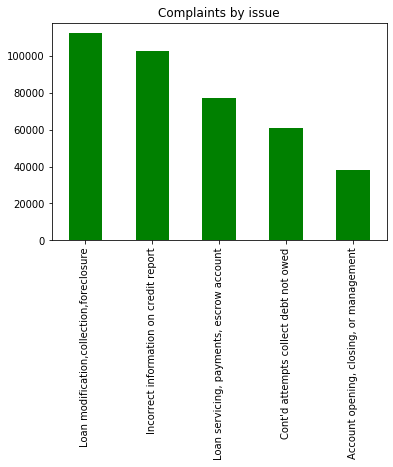

In [7]:
issue.plot(kind='bar',color='green',title='Complaints by issue')

In [8]:
product =df['Product'].value_counts().head(5)
product

Mortgage                   242194
Debt collection            171567
Credit reporting           140424
Credit card                 89190
Bank account or service     86207
Name: Product, dtype: int64

In [9]:
sub_issue =df['Sub-issue'].value_counts().head(8)

In [10]:
sub_issue

Account status                          37056
Debt is not mine                        36752
Information is not mine                 32379
Not given enough info to verify debt    21820
Debt was paid                           19179
Frequent or repeated calls              16041
Account terms                           10995
Attempted to collect wrong amount       10881
Name: Sub-issue, dtype: int64

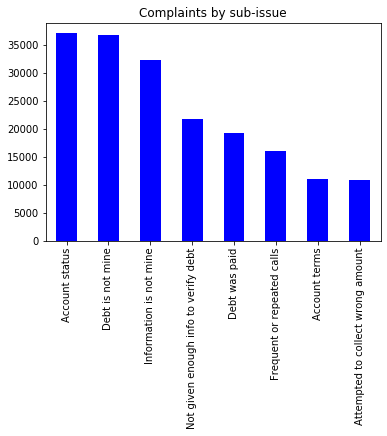

In [11]:

sub_issue.plot(kind='bar',color='blue',title='Complaints by sub-issue')

In [12]:
 mode=df.groupby(['Submitted via']).sum()

In [13]:
mode.index

Index(['Email', 'Fax', 'Phone', 'Postal mail', 'Referral', 'Web'], dtype='object', name='Submitted via')

In [14]:
label1 = list(mode.index)

In [15]:
label1

['Email', 'Fax', 'Phone', 'Postal mail', 'Referral', 'Web']

C:\Users\Kavya\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  This is separate from the ipykernel package so we can avoid doing imports until


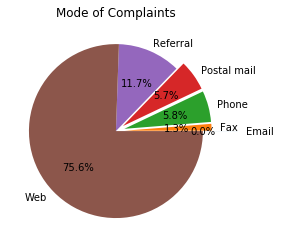

In [16]:
explode = (0.4, 0.1,0.1,0.1,0,0)
fig3, ax1 = plt.subplots()
ax1.pie(mode, explode=explode, labels=label1,autopct='%1.1f%%')
plt.title("Mode of Complaints")
plt.show()

In [17]:
 time=df.groupby(['Timely response?']).sum()

In [18]:
label2=list(time.index)

In [19]:
label2

['No', 'Yes']

C:\Users\Kavya\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  This is separate from the ipykernel package so we can avoid doing imports until


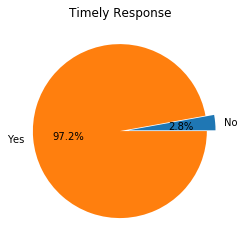

In [20]:
explode = (0.1,0)
fig4, ax1 = plt.subplots()
ax1.pie(time, explode=explode, labels=label2,autopct='%1.1f%%')
plt.title("Timely Response")
plt.show()

In [21]:
dispute=df.groupby(['Consumer disputed?']).sum()

In [22]:
label3=list(dispute.index)

In [23]:
label3

['No', 'Yes']

C:\Users\Kavya\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  This is separate from the ipykernel package so we can avoid doing imports until


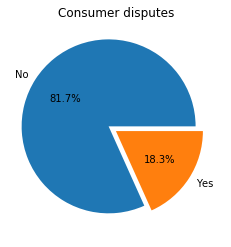

In [24]:
explode = (0.1,0)
fig3, ax1 = plt.subplots()
ax1.pie(dispute, explode=explode, labels=label2,autopct='%1.1f%%')
plt.title("Consumer disputes")
plt.show()

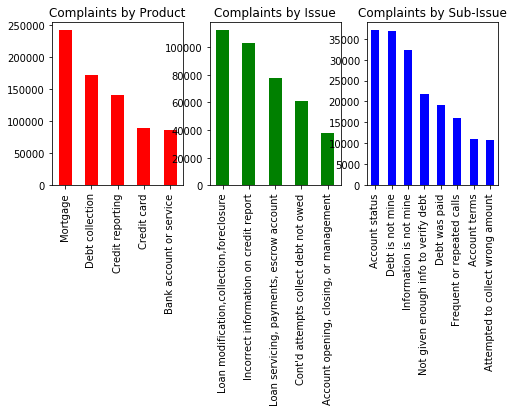

In [25]:
fig, axs = plt.subplots(1, 3,figsize=(8,3))
product.plot(kind='bar',ax=axs[0],color='red',title='Complaints by Product')
issue.plot(kind='bar',ax=axs[1],color='green',title='Complaints by Issue')
sub_issue.plot(kind='bar',ax=axs[2],color='blue',title='Complaints by Sub-Issue')


#segment_yearwise_qty.plot(kind='bar',ax=axs[1,1],color='yellow', title='Quantity')

In [26]:

df['complaint'] = df[['Issue','Sub-issue','Consumer complaint narrative']].astype(str).agg(' , '.join,axis=1)

#df["new_complaint"] = df["Issue"].astype(str) + df["Sub-issue"].astype(str) + df['Consumer complaint narrative'].astype(str)

In [27]:
df["complaint"]

0         Loan modification,collection,foreclosure , nan...
1         Incorrect information on credit report , Accou...
2         Managing the loan or lease , nan , I purchased...
3                                    Bankruptcy , nan , nan
4         Communication tactics , Frequent or repeated c...
5         Loan servicing, payments, escrow account , nan...
6         Improper contact or sharing of info , Contacte...
7         Credit reporting company's investigation , Ina...
8         Loan modification,collection,foreclosure , nan...
9         Loan modification,collection,foreclosure , nan...
10        Loan modification,collection,foreclosure , nan...
11                           Repaying your loan , nan , nan
12        Disclosure verification of debt , Not given en...
13        Incorrect information on credit report , Accou...
14                   Closing/Cancelling account , nan , nan
15        Incorrect information on credit report , Accou...
16        Improper contact or sharing of

In [28]:
df_complaint = df[["Product","complaint"]]

In [29]:
df_complaint.shape

(903983, 2)

In [30]:
df_complaint.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 903983 entries, 0 to 903982
Data columns (total 2 columns):
Product      903983 non-null object
complaint    903983 non-null object
dtypes: object(2)
memory usage: 13.8+ MB


In [31]:
df_complaint.Product.value_counts()

Mortgage                                                                        242194
Debt collection                                                                 171567
Credit reporting                                                                140424
Credit card                                                                      89190
Bank account or service                                                          86207
Credit reporting, credit repair services, or other personal consumer reports     59186
Student loan                                                                     38612
Consumer Loan                                                                    31608
Credit card or prepaid card                                                      11921
Checking or savings account                                                       9947
Payday loan                                                                       5546
Money transfers                            

In [32]:
df_complaint.head(5)

,Product,complaint
0,Mortgage,"Loan modification,collection,foreclosure , nan..."
1,Credit reporting,"Incorrect information on credit report , Accou..."
2,Consumer Loan,"Managing the loan or lease , nan , I purchased..."
3,Credit card,"Bankruptcy , nan , nan"
4,Debt collection,"Communication tactics , Frequent or repeated c..."


In [33]:
df_complaint.replace('Credit reporting, credit repair services, or other personal consumer reports','Credit reporting', inplace=True)
df_complaint.replace('Credit card or prepaid card','Credit card', inplace=True)
df_complaint.replace('Money transfer, virtual currency, or money service','Money transfer',inplace=True)
df_complaint.replace('Payday loan, title loan, or personal loan','Loan', inplace=True)


C:\Users\Kavya\Anaconda3\lib\site-packages\pandas\core\frame.py:4042: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  method=method)


In [34]:
df_complaint.Product.value_counts()

Mortgage                       242194
Credit reporting               199610
Debt collection                171567
Credit card                    101111
Bank account or service         86207
Student loan                    38612
Consumer Loan                   31608
Checking or savings account      9947
Payday loan                      5546
Money transfers                  5354
Prepaid card                     3819
Vehicle loan or lease            2873
Loan                             2245
Money transfer                   2213
Other financial service          1059
Virtual currency                   18
Name: Product, dtype: int64

Text(0.5, 1.0, 'product wise complaints')

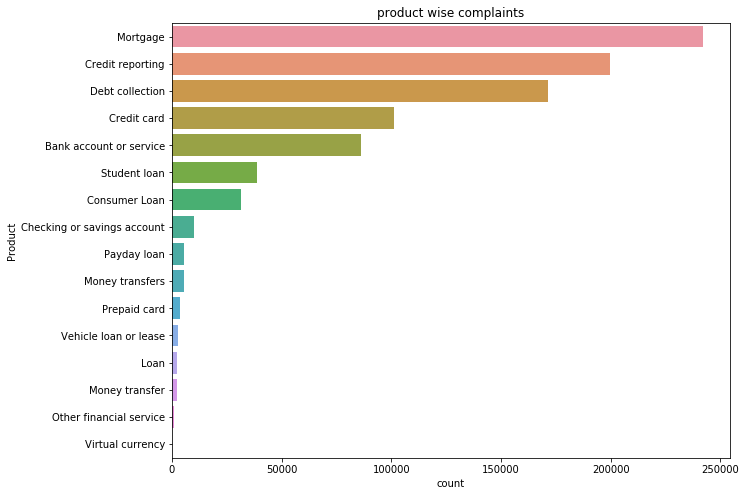

In [35]:
fig, ax = plt.subplots(1,1,figsize=(10,8))
ax=sns.countplot(y='Product',data=df_complaint,order=df_complaint['Product'].value_counts().index)
plt.title('product wise complaints')

In [36]:
df_complaint.replace('Student loan', 'Loan', inplace=True)
df_complaint.replace('Consumer Loan', 'Loan', inplace=True)
df_complaint.replace('Payday loan', 'Loan', inplace=True)
df_complaint.replace('Vehicle loan or lease', 'Loan', inplace=True)
df_complaint.replace('Virtual currency', 'Money transfers', inplace=True)
df_complaint.replace('Money transfer','Money transfers',inplace=True)
df_complaint.replace('Other financial service','Money transfers',inplace=True)

In [37]:
df_complaint.Product.value_counts()


Mortgage                       242194
Credit reporting               199610
Debt collection                171567
Credit card                    101111
Bank account or service         86207
Loan                            80884
Checking or savings account      9947
Money transfers                  8644
Prepaid card                     3819
Name: Product, dtype: int64

In [38]:
product =df['Product'].value_counts()


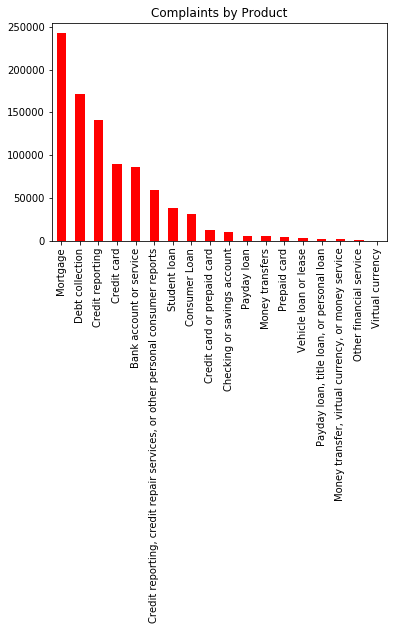

In [39]:
fig, ax = plt.subplots(1,1,figsize=(6,4))
product.plot(kind='bar',ax=ax,color='red',title='Complaints by Product')

In [40]:
df_complaint['Product'].unique()

array(['Mortgage', 'Credit reporting', 'Loan', 'Credit card',
       'Debt collection', 'Bank account or service', 'Money transfers',
       'Prepaid card', 'Checking or savings account'], dtype=object)

In [41]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB

In [42]:
from sklearn.pipeline import Pipeline

complaint_classify = Pipeline([
     ('vect', CountVectorizer()),
     ('tfidf', TfidfTransformer()),
     ('clf', MultinomialNB()),])

In [43]:
#split train and test
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test= train_test_split(df_complaint["complaint"],df_complaint['Product'],test_size=0.20,random_state=6)

In [44]:
complaint_classify.fit(X_train,y_train)

Pipeline(memory=None,
         steps=[('vect',
                 CountVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=None)),
                ('tfidf',
                 TfidfTransformer(norm='l2', smooth_idf=True,
                                  sublinear_tf=False, use_idf=True)),
                ('clf',
                 MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))],
         verbose=False)

In [45]:
complaint_classify.score(X_train,y_train)

0.9384625808574835

In [46]:
complaint_classify.score(X_test,y_test)

0.9376648948821054

In [47]:
complaint_2 = ["my credit card details are wrongly printed on the card, so pleae make corrections as soon as possible.the required documents are provided"]
print(complaint_classify.predict(complaint_2))

['Credit reporting']


In [48]:
complaint_1 = ["my bank account is linked with my mobile number but im not getting any message updates and can't make online transactions "]
print(complaint_classify.predict(complaint_1))

['Bank account or service']


In [79]:
complaint_3 = ["my loan is still not approved i have provided all the details require to approve my loan"]
print(complaint_classify.predict(complaint_3))

NotFittedError: CountVectorizer - Vocabulary wasn't fitted.

In [50]:
ypred=complaint_classify.predict(X_test)

In [51]:

from sklearn.metrics import confusion_matrix,precision_score,recall_score,accuracy_score,classification_report
confusion_matrix(y_test, ypred)



array([[15663,     0,   930,    41,    80,   474,     0,    41,     0],
       [  333,   960,   282,   188,     8,   204,     0,     5,     0],
       [   13,     0, 17063,   675,   430,   478,     0,  1662,     0],
       [    0,     0,   317, 39108,   278,   360,    11,    30,     0],
       [    0,     0,    52,    68, 33707,   285,     0,    37,     0],
       [    7,     0,   110,   308,   203, 15440,     0,   131,     0],
       [   72,     0,   745,    35,    79,   133,   598,    16,     0],
       [    2,     0,    56,   128,   110,  1214,     0, 46835,     0],
       [  198,     0,   275,     2,     7,    47,    86,    24,   153]],
      dtype=int64)

In [52]:

print("precision_score\t\t",precision_score(y_test,ypred,average='weighted'))
print("recall_score\t\t",recall_score(y_test,ypred,average='weighted'))
print("Accuracy_score \t\t",accuracy_score(y_test,ypred))
print("classification_report \n",classification_report(y_test,ypred))

precision_score		 0.9389647733700776
recall_score		 0.9376648948821054
Accuracy_score 		 0.9376648948821054
classification_report 
                              precision    recall  f1-score   support

    Bank account or service       0.96      0.91      0.93     17229
Checking or savings account       1.00      0.48      0.65      1980
                Credit card       0.86      0.84      0.85     20321
           Credit reporting       0.96      0.98      0.97     40104
            Debt collection       0.97      0.99      0.98     34149
                       Loan       0.83      0.95      0.89     16199
            Money transfers       0.86      0.36      0.50      1678
                   Mortgage       0.96      0.97      0.96     48345
               Prepaid card       1.00      0.19      0.32       792

                   accuracy                           0.94    180797
                  macro avg       0.93      0.74      0.78    180797
               weighted avg       0.94

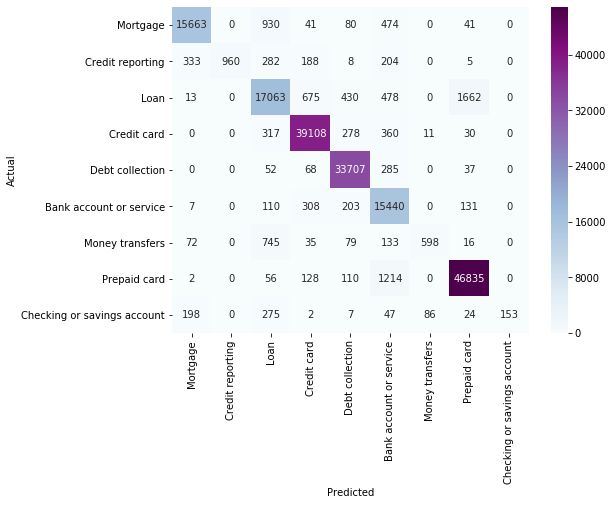

In [53]:
conf_mat = confusion_matrix(y_test,ypred)
fig, ax = plt.subplots(figsize=(8,6))
sns.heatmap(conf_mat, annot=True, fmt="d", cmap="BuPu",xticklabels=df_complaint['Product'].unique(),yticklabels=df_complaint['Product'].unique())
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [54]:
import pickle
with open('complaint_model.pickle', 'wb') as to_write:
    pickle.dump(complaint_classify, to_write)

In [55]:
with open('complaint_classify.pickle', 'rb') as to_read:
    complaint_classify = pickle.load(to_read)

In [81]:
from sklearn.svm import LinearSVC
clf= Pipeline([
     ('vect', CountVectorizer()),
     ('tfidf', TfidfTransformer()),
     ('svc',LinearSVC()),])

In [82]:
clf.fit(X_train,y_train)

Pipeline(memory=None,
         steps=[('vect',
                 CountVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=None)),
                ('tfidf',
                 TfidfTransformer(norm='l2', smooth_idf=True,
                                  sublinear_tf=False, use_idf=True)),
                ('svc',
                 LinearSVC(C=1.0, class_weight=None, dual=True,
                           fit_intercept=True, intercept_scaling=1,
                     

In [83]:
clf.score(X_train,y_train)

0.9884400417043472

In [84]:
clf.score(X_test,y_test)

0.9841590291874313

In [85]:
complaint_2 = ["my credit card details are wrongly printed on the card, so pleae make corrections as soon as possible.the required documents are provided"]

print(clf.predict(complaint_2))

['Credit card']


In [86]:
complaint_3 = ["my loan is still not approved i have provided all the details require to approve my loan"]
print(clf.predict(complaint_3))

['Loan']


In [61]:
ypred2=clf.predict(X_test)

In [62]:
print("precision_score\t\t",precision_score(y_test,ypred2,average='weighted'))
print("recall_score\t\t",recall_score(y_test,ypred2,average='weighted'))
print("Accuracy_score \t\t",accuracy_score(y_test,ypred2))
print("classification_report \n",classification_report(y_test,ypred2))

precision_score		 0.9845470022435321
recall_score		 0.9841590291874313
Accuracy_score 		 0.9841590291874313
classification_report 
                              precision    recall  f1-score   support

    Bank account or service       0.99      0.99      0.99     17229
Checking or savings account       0.99      0.92      0.95      1980
                Credit card       0.93      0.98      0.96     20321
           Credit reporting       0.99      0.99      0.99     40104
            Debt collection       1.00      1.00      1.00     34149
                       Loan       0.99      0.98      0.99     16199
            Money transfers       0.89      0.89      0.89      1678
                   Mortgage       1.00      0.98      0.99     48345
               Prepaid card       0.99      0.81      0.89       792

                   accuracy                           0.98    180797
                  macro avg       0.97      0.95      0.96    180797
               weighted avg       0.98

In [91]:
import pickle
with open('complaint_classify_model.pickle', 'wb') as to_write:
    pickle.dump(clf, to_write)

In [87]:
from sklearn.linear_model import LogisticRegression
com = Pipeline([
     ('vect', CountVectorizer()),
     ('tfidf', TfidfTransformer()),
     ('lg',LogisticRegression()),])

In [88]:
com.fit(X_train,y_train)

C:\Users\Kavya\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Kavya\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Pipeline(memory=None,
         steps=[('vect',
                 CountVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=None)),
                ('tfidf',
                 TfidfTransformer(norm='l2', smooth_idf=True,
                                  sublinear_tf=False, use_idf=True)),
                ('lg',
                 LogisticRegression(C=1.0, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_scaling=1,
   

In [89]:
complaint_2 = ["my credit card details are wrongly printed on the card, so pleae make corrections as soon as possible.the required documents are provided"]

print(com.predict(complaint_2))

['Credit card']


In [90]:
complaint_3 = ["my loan is still not approved i have provided all the details require to approve my loan"]
print(com.predict(complaint_3))

['Loan']


In [65]:
ypred1=com.predict(X_test)

In [66]:
com.score(X_test,y_test)

0.9806523338329729

In [67]:
com.score(X_train,y_train)

0.9824623264277793

In [68]:
confusion_matrix(y_test, ypred1)

array([[16995,     3,   103,    18,    16,    15,    12,    64,     3],
       [  207,  1708,    24,    26,     0,     8,     3,     4,     0],
       [   56,     2, 19909,   225,    64,    21,    29,    13,     2],
       [    7,     2,   101, 39760,    79,    71,    25,    59,     0],
       [    7,     0,    39,    48, 33926,    54,     0,    75,     0],
       [   20,     1,    52,   193,    92, 15805,     4,    32,     0],
       [   70,     0,    92,    13,    10,    21,  1454,    16,     2],
       [    8,     0,  1109,    46,    18,    12,     0, 47152,     0],
       [   22,     5,    67,     2,     3,     0,   103,     0,   590]],
      dtype=int64)

In [69]:
print("precision_score\t\t",precision_score(y_test,ypred1,average='weighted'))
print("recall_score\t\t",recall_score(y_test,ypred1,average='weighted'))
print("Accuracy_score \t\t",accuracy_score(y_test,ypred1))
print("classification_report \n",classification_report(y_test,ypred1))

precision_score		 0.9810791183872514
recall_score		 0.9806523338329729
Accuracy_score 		 0.9806523338329729
classification_report 
                              precision    recall  f1-score   support

    Bank account or service       0.98      0.99      0.98     17229
Checking or savings account       0.99      0.86      0.92      1980
                Credit card       0.93      0.98      0.95     20321
           Credit reporting       0.99      0.99      0.99     40104
            Debt collection       0.99      0.99      0.99     34149
                       Loan       0.99      0.98      0.98     16199
            Money transfers       0.89      0.87      0.88      1678
                   Mortgage       0.99      0.98      0.98     48345
               Prepaid card       0.99      0.74      0.85       792

                   accuracy                           0.98    180797
                  macro avg       0.97      0.93      0.95    180797
               weighted avg       0.98

In [70]:
from sklearn.ensemble import RandomForestClassifier
comp = Pipeline([
     ('vect', CountVectorizer()),
     ('tfidf', TfidfTransformer()),
     ('rf',RandomForestClassifier(max_depth=2, random_state=0))])


In [71]:
comp.fit(X_train,y_train)

C:\Users\Kavya\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Pipeline(memory=None,
         steps=[('vect',
                 CountVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=Non...
                ('rf',
                 RandomForestClassifier(bootstrap=True, class_weight=None,
                                        criterion='gini', max_depth=2,
                                        max_features='auto',
                                        max_leaf_nodes=None,
                                        min_i

In [72]:
comp.score(X_train,y_train)

0.47175830284325193

In [73]:
comp.score(X_test,y_test)

0.4722865976758464

In [74]:
ypred3=comp.predict(X_test)

In [75]:
confusion_matrix(y_test, ypred2)

array([[17073,     6,    68,    14,     5,    11,    10,    39,     3],
       [  110,  1817,    15,    26,     2,     4,     2,     4,     0],
       [   45,     5, 19958,   203,    32,    24,    39,    12,     3],
       [    6,     3,    88, 39842,    40,    61,    25,    39,     0],
       [    2,     0,    25,    25, 34025,    29,     0,    43,     0],
       [   13,     1,    37,   168,    48, 15903,     4,    25,     0],
       [   42,     3,    89,    23,     4,    16,  1489,    10,     2],
       [    8,     0,  1111,    16,    12,    10,     1, 47187,     0],
       [    7,     5,    35,     3,     1,     1,   101,     0,   639]],
      dtype=int64)

In [76]:
print("precision_score\t\t",precision_score(y_test,ypred3,average='weighted'))
print("recall_score\t\t",recall_score(y_test,ypred3,average='weighted'))
print("Accuracy_score \t\t",accuracy_score(y_test,ypred3))
print("classification_report \n",classification_report(y_test,ypred3))

C:\Users\Kavya\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


precision_score		 0.4796738162299339
recall_score		 0.4722865976758464
Accuracy_score 		 0.4722865976758464


C:\Users\Kavya\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


classification_report 
                              precision    recall  f1-score   support

    Bank account or service       0.00      0.00      0.00     17229
Checking or savings account       0.00      0.00      0.00      1980
                Credit card       0.00      0.00      0.00     20321
           Credit reporting       0.94      0.75      0.84     40104
            Debt collection       0.95      0.22      0.35     34149
                       Loan       0.00      0.00      0.00     16199
            Money transfers       0.00      0.00      0.00      1678
                   Mortgage       0.34      0.99      0.51     48345
               Prepaid card       0.00      0.00      0.00       792

                   accuracy                           0.47    180797
                  macro avg       0.25      0.22      0.19    180797
               weighted avg       0.48      0.47      0.39    180797



In [77]:
print(com.predict(complaint_2))

['Credit card']


In [78]:
print(comp.predict(complaint_3))

NameError: name 'complaint_3' is not defined

In [80]:
print(clf.predict(complaint_1))

['Loan']
